**PATIENT TREATMENT CLASSIFICATION**

> Help doctors predict the patient status (incare or an outcare)


**Import Libraries**

In [504]:
import pandas as pd

In [505]:
patient_data=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/training_set_label.csv" )

In [506]:
patient_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [507]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


In [508]:
patient_data.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

In [509]:
patient_data.corr()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
HAEMATOCRIT,1.000000,0.971871,0.861447,-0.213708,-0.006062,0.091311,0.125880,0.056896,-0.257839,-0.272349
HAEMOGLOBINS,0.971871,1.000000,0.815221,-0.202026,-0.044982,0.211015,0.331856,0.107450,-0.241170,-0.254954
ERYTHROCYTE,0.861447,0.815221,1.000000,-0.185148,0.022771,-0.380908,-0.034858,-0.438664,-0.421525,-0.238046
LEUCOCYTE,-0.213708,-0.202026,-0.185148,1.000000,0.282004,-0.007652,0.010402,-0.011583,0.190361,0.139689
THROMBOCYTE,-0.006062,-0.044982,0.022771,0.282004,1.000000,-0.133466,-0.188588,-0.076347,0.024690,-0.229550
MCH,0.091311,0.211015,-0.380908,-0.007652,-0.133466,1.000000,0.592997,0.931807,0.360716,-0.002167
MCHC,0.125880,0.331856,-0.034858,0.010402,-0.188588,0.592997,1.000000,0.263571,0.048137,0.026026
MCV,0.056896,0.107450,-0.438664,-0.011583,-0.076347,0.931807,0.263571,1.000000,0.405839,-0.013600
AGE,-0.257839,-0.241170,-0.421525,0.190361,0.024690,0.360716,0.048137,0.405839,1.000000,0.113494
SOURCE,-0.272349,-0.254954,-0.238046,0.139689,-0.229550,-0.002167,0.026026,-0.013600,0.113494,1.000000


In [510]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

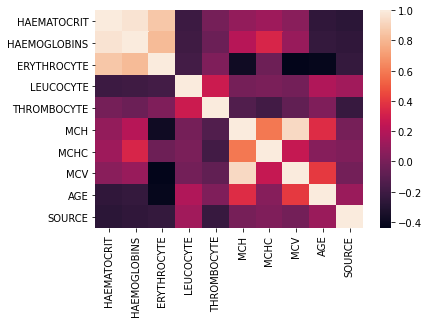

In [511]:
sns.heatmap(patient_data.corr())

In [512]:
incure=patient_data[patient_data['SOURCE']==1]

In [513]:
outcure=patient_data[patient_data['SOURCE']==0]

In [514]:
incure


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
7,38.4,12.3,4.37,9.0,193,28.1,32.0,87.9,74,M,1
8,27.9,9.2,3.13,19.2,135,29.4,33.0,89.1,56,M,1
9,38.2,12.9,4.53,11.7,452,28.5,33.8,84.3,66,M,1
10,30.5,10.0,3.46,7.3,230,28.9,32.8,88.2,62,M,1
...,...,...,...,...,...,...,...,...,...,...,...
3301,43.7,13.8,5.02,6.2,297,27.5,31.6,87.1,52,F,1
3302,43.1,14.3,5.24,5.5,55,27.3,33.2,82.3,22,M,1
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1


In [515]:
outcure

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
5,32.8,11.2,3.94,11.0,324,28.4,34.1,83.2,89,F,0
...,...,...,...,...,...,...,...,...,...,...,...
3298,37.2,11.7,6.18,16.6,336,18.9,31.5,60.2,33,F,0
3299,33.7,11.6,4.16,5.2,205,27.9,34.4,81.0,4,M,0
3303,34.3,11.2,4.41,11.0,103,25.4,32.7,77.8,8,F,0
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0


In [516]:
print(len(patient_data))
print(len(incure))
print( len(incure)/len(patient_data)*100.0, "%")
print(len(outcure))
print( len(outcure)/len(patient_data)*100.0, "%")

3309
1317
39.80054397098821 %
1992
60.19945602901179 %


In [517]:
patient_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,M,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,F,1
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,M,0
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,M,0


In [518]:
patient_data=pd.get_dummies(patient_data,drop_first=True)

In [519]:
patient_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE,SEX_M
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,1,0
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,0,1
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,1,0
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,0,1
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,0,1


In [520]:
Y=patient_data['SOURCE']

In [521]:
patient_data.drop('SOURCE',axis=1,inplace=True)

In [522]:
patient_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX_M
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,0
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,1
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,0
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,0
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,1
...,...,...,...,...,...,...,...,...,...,...
3304,39.0,13.2,4.45,4.0,50,29.7,33.8,87.6,45,1
3305,25.4,8.2,3.27,5.4,90,25.1,32.3,77.7,1,0
3306,38.2,12.4,4.40,8.4,328,28.2,32.5,86.8,64,1
3307,43.4,15.2,5.29,10.1,326,28.7,35.0,82.0,33,1


**Splitting of Training Data and Test Data**

In [523]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=(train_test_split(patient_data,Y,test_size=0.20))

In [524]:
X_train.shape

(2647, 10)

In [525]:
X_test.shape

(662, 10)

**Training the Model**

In [526]:

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=750,criterion='gini')

In [527]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [528]:
predictions=model.predict(X_test)

**Evaluation of the Model**

In [529]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
matrix=confusion_matrix(Y_test,predictions)
print(matrix)
score=accuracy_score(Y_test,predictions)
print(score)
report=classification_report(Y_test,predictions)
print(report)

[[350  46]
 [ 97 169]]
0.783987915407855
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       396
           1       0.79      0.64      0.70       266

    accuracy                           0.78       662
   macro avg       0.78      0.76      0.77       662
weighted avg       0.78      0.78      0.78       662



In [530]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/patient_treat_class/testing_set_label.csv')

In [531]:
test_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,41.2,14.3,3.99,4.1,296,35.8,34.7,103.3,24,M
1,25.4,9.1,3.17,19.3,304,28.7,35.8,80.1,66,M
2,47.5,15.2,6.23,11.5,385,24.4,32.0,76.2,17,F
3,43.0,14.5,5.35,4.8,134,27.1,33.7,80.4,14,M
4,40.7,13.6,4.77,4.3,199,28.5,33.4,85.3,24,M
...,...,...,...,...,...,...,...,...,...,...
1098,32.0,10.2,3.60,12.9,270,28.3,31.9,88.9,73,M
1099,42.0,13.5,5.00,5.0,297,27.0,32.1,84.0,38,F
1100,39.3,13.3,4.49,3.3,50,29.6,33.8,87.5,47,F
1101,38.9,12.9,4.32,3.2,154,29.9,33.2,90.0,46,F


In [532]:
test_data=pd.get_dummies(test_data,drop_first=True)

In [533]:
test_data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX_M
0,41.2,14.3,3.99,4.1,296,35.8,34.7,103.3,24,1
1,25.4,9.1,3.17,19.3,304,28.7,35.8,80.1,66,1
2,47.5,15.2,6.23,11.5,385,24.4,32.0,76.2,17,0
3,43.0,14.5,5.35,4.8,134,27.1,33.7,80.4,14,1
4,40.7,13.6,4.77,4.3,199,28.5,33.4,85.3,24,1
...,...,...,...,...,...,...,...,...,...,...
1098,32.0,10.2,3.60,12.9,270,28.3,31.9,88.9,73,1
1099,42.0,13.5,5.00,5.0,297,27.0,32.1,84.0,38,0
1100,39.3,13.3,4.49,3.3,50,29.6,33.8,87.5,47,0
1101,38.9,12.9,4.32,3.2,154,29.9,33.2,90.0,46,0


In [534]:
predictions=model.predict(test_data)

In [535]:
predictions

array([0, 1, 0, ..., 1, 0, 1])